UC3MAL201 Machine Learning Session 3 Activity sheet 3
Leon Eriksen Helgeland
# Linear Regression
### Objective 
In this activity sheet we will learn how to implement linear regression models using scikit-learn. The dataset that is going to be used for training your models has ben provided to you. You should load it using appropriate Python code and Pandas libraries and then split the data into training and testing datasets as indicated below. Create and train different linear regression models, evaluate and compare them following the steps below.

### Dataset description   
A governmental authority, responsible for environmental issues of your country, wants to decrease the CO2 emissions of cars on the streets. So, it is going to apply a fee policy to car owners based on the predicted emissions of their owning cars. In order to predict the CO2 emission of each car, not being able to measure all the cars individually, is going to use the Fuel Consumption dataset of 2015. It’s a fairly small dataset comprising of around 1000 entries (so we are not going to put your computers into test here). 

In [1]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# 1. Basic data preprocessing  
- A) Load the data using the Pandas library 
- B) Explore the data: are there any errors, any missing values? are all the attributes numerical or there are also categorical ones? 
- C) Split the data into training and testing datasets with a ratio of 80% - 20%

In [2]:
dataset_file_name = 'FuelConsumption.csv'
dataset_directory = 'dataset'

## A) Load the data using the Pandas library


In [3]:
df = pd.read_csv(f'{dataset_directory}/{dataset_file_name}')

## B) Explore the data: are there any errors, any missing values? are all the attributes numerical or there are also categorical ones?

In [4]:
# 1
df.info() # Same amount of Non-Null for all lines, indicating a clean dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# 2
df.head() # Identifyed that Make, Model, Vehicleclass, Transmission and Fueltype is categorical and needs to be converted to binary boolean columns for use in a model

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [6]:
# 3
df['MODEL'].value_counts() # We see here that there are 663 different models, therefore we exclude it from the final regression, due to the sheer amount of columns it would generate (663 columns for the model attribute)

F150 FFV 4X4      8
F150 FFV          8
BEETLE            6
FOCUS FFV         6
ACCORD            6
                 ..
E 550 COUPE       1
HIGHLANDER AWD    1
X6 xDRIVE50i      1
PRIUS             1
IS 350 C          1
Name: MODEL, Length: 663, dtype: int64

## C) Split the data into training and testing datasets with a ratio of 80% - 20%

In [7]:
# 1 - Get columns
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
# 2 - Split
y = df['CO2EMISSIONS']
X = df[['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train_test_split(X.values.reshape(-1,1), y, test_size=0.3, random_state=42)

In [9]:
# 3 - Creating a new training dataframe for further use
train_df = pd.concat([X_train,y_train],axis=1) # Re-combining the training attributes after split

In [10]:
# 4 - Binaryizing category columns

# Converting MAKE attribute category to binary in train_df
attribute = pd.get_dummies(train_df['MAKE'],drop_first=True)
train_df = train_df.drop('MAKE',axis=1)
train_df = pd.concat([train_df,attribute],axis=1)
# Converting VEHICLECLASS attribute category to binary in train_df
attribute = pd.get_dummies(train_df['VEHICLECLASS'],drop_first=True)
train_df = train_df.drop('VEHICLECLASS',axis=1)
train_df = pd.concat([train_df,attribute],axis=1)
# Converting TRANSMISSION attribute category to binary in train_df
attribute = pd.get_dummies(train_df['TRANSMISSION'],drop_first=True)
train_df = train_df.drop('TRANSMISSION',axis=1)
train_df = pd.concat([train_df,attribute],axis=1)
# Converting FUELTYPE attribute category to binary in train_df
attribute = pd.get_dummies(train_df['FUELTYPE'],drop_first=True)
train_df = train_df.drop('FUELTYPE',axis=1)
train_df = pd.concat([train_df,attribute],axis=1)

# 2. Investigate correlations between attributes
Compute the linear correlation between each attribute and the target value, using the corr() method. Plot also histograms to visualise the correlation between them.

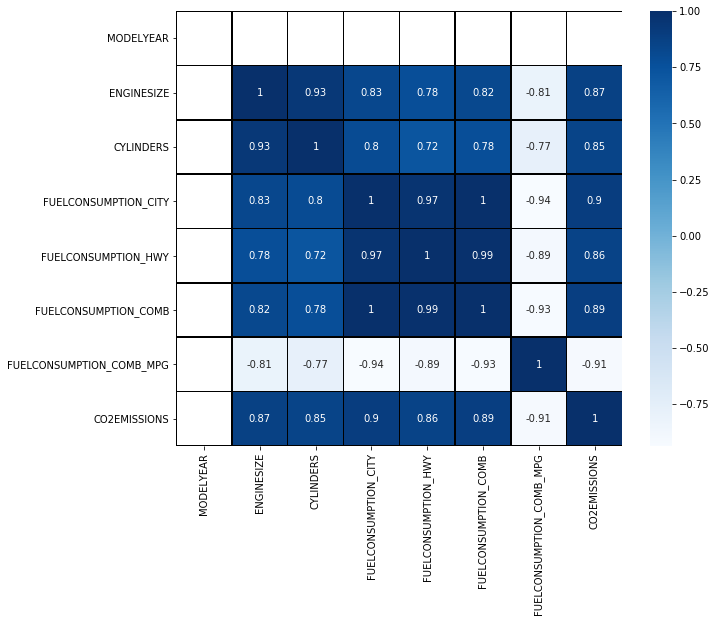

In [11]:
# 1 - Correlation of original dataframe
correlation = df.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

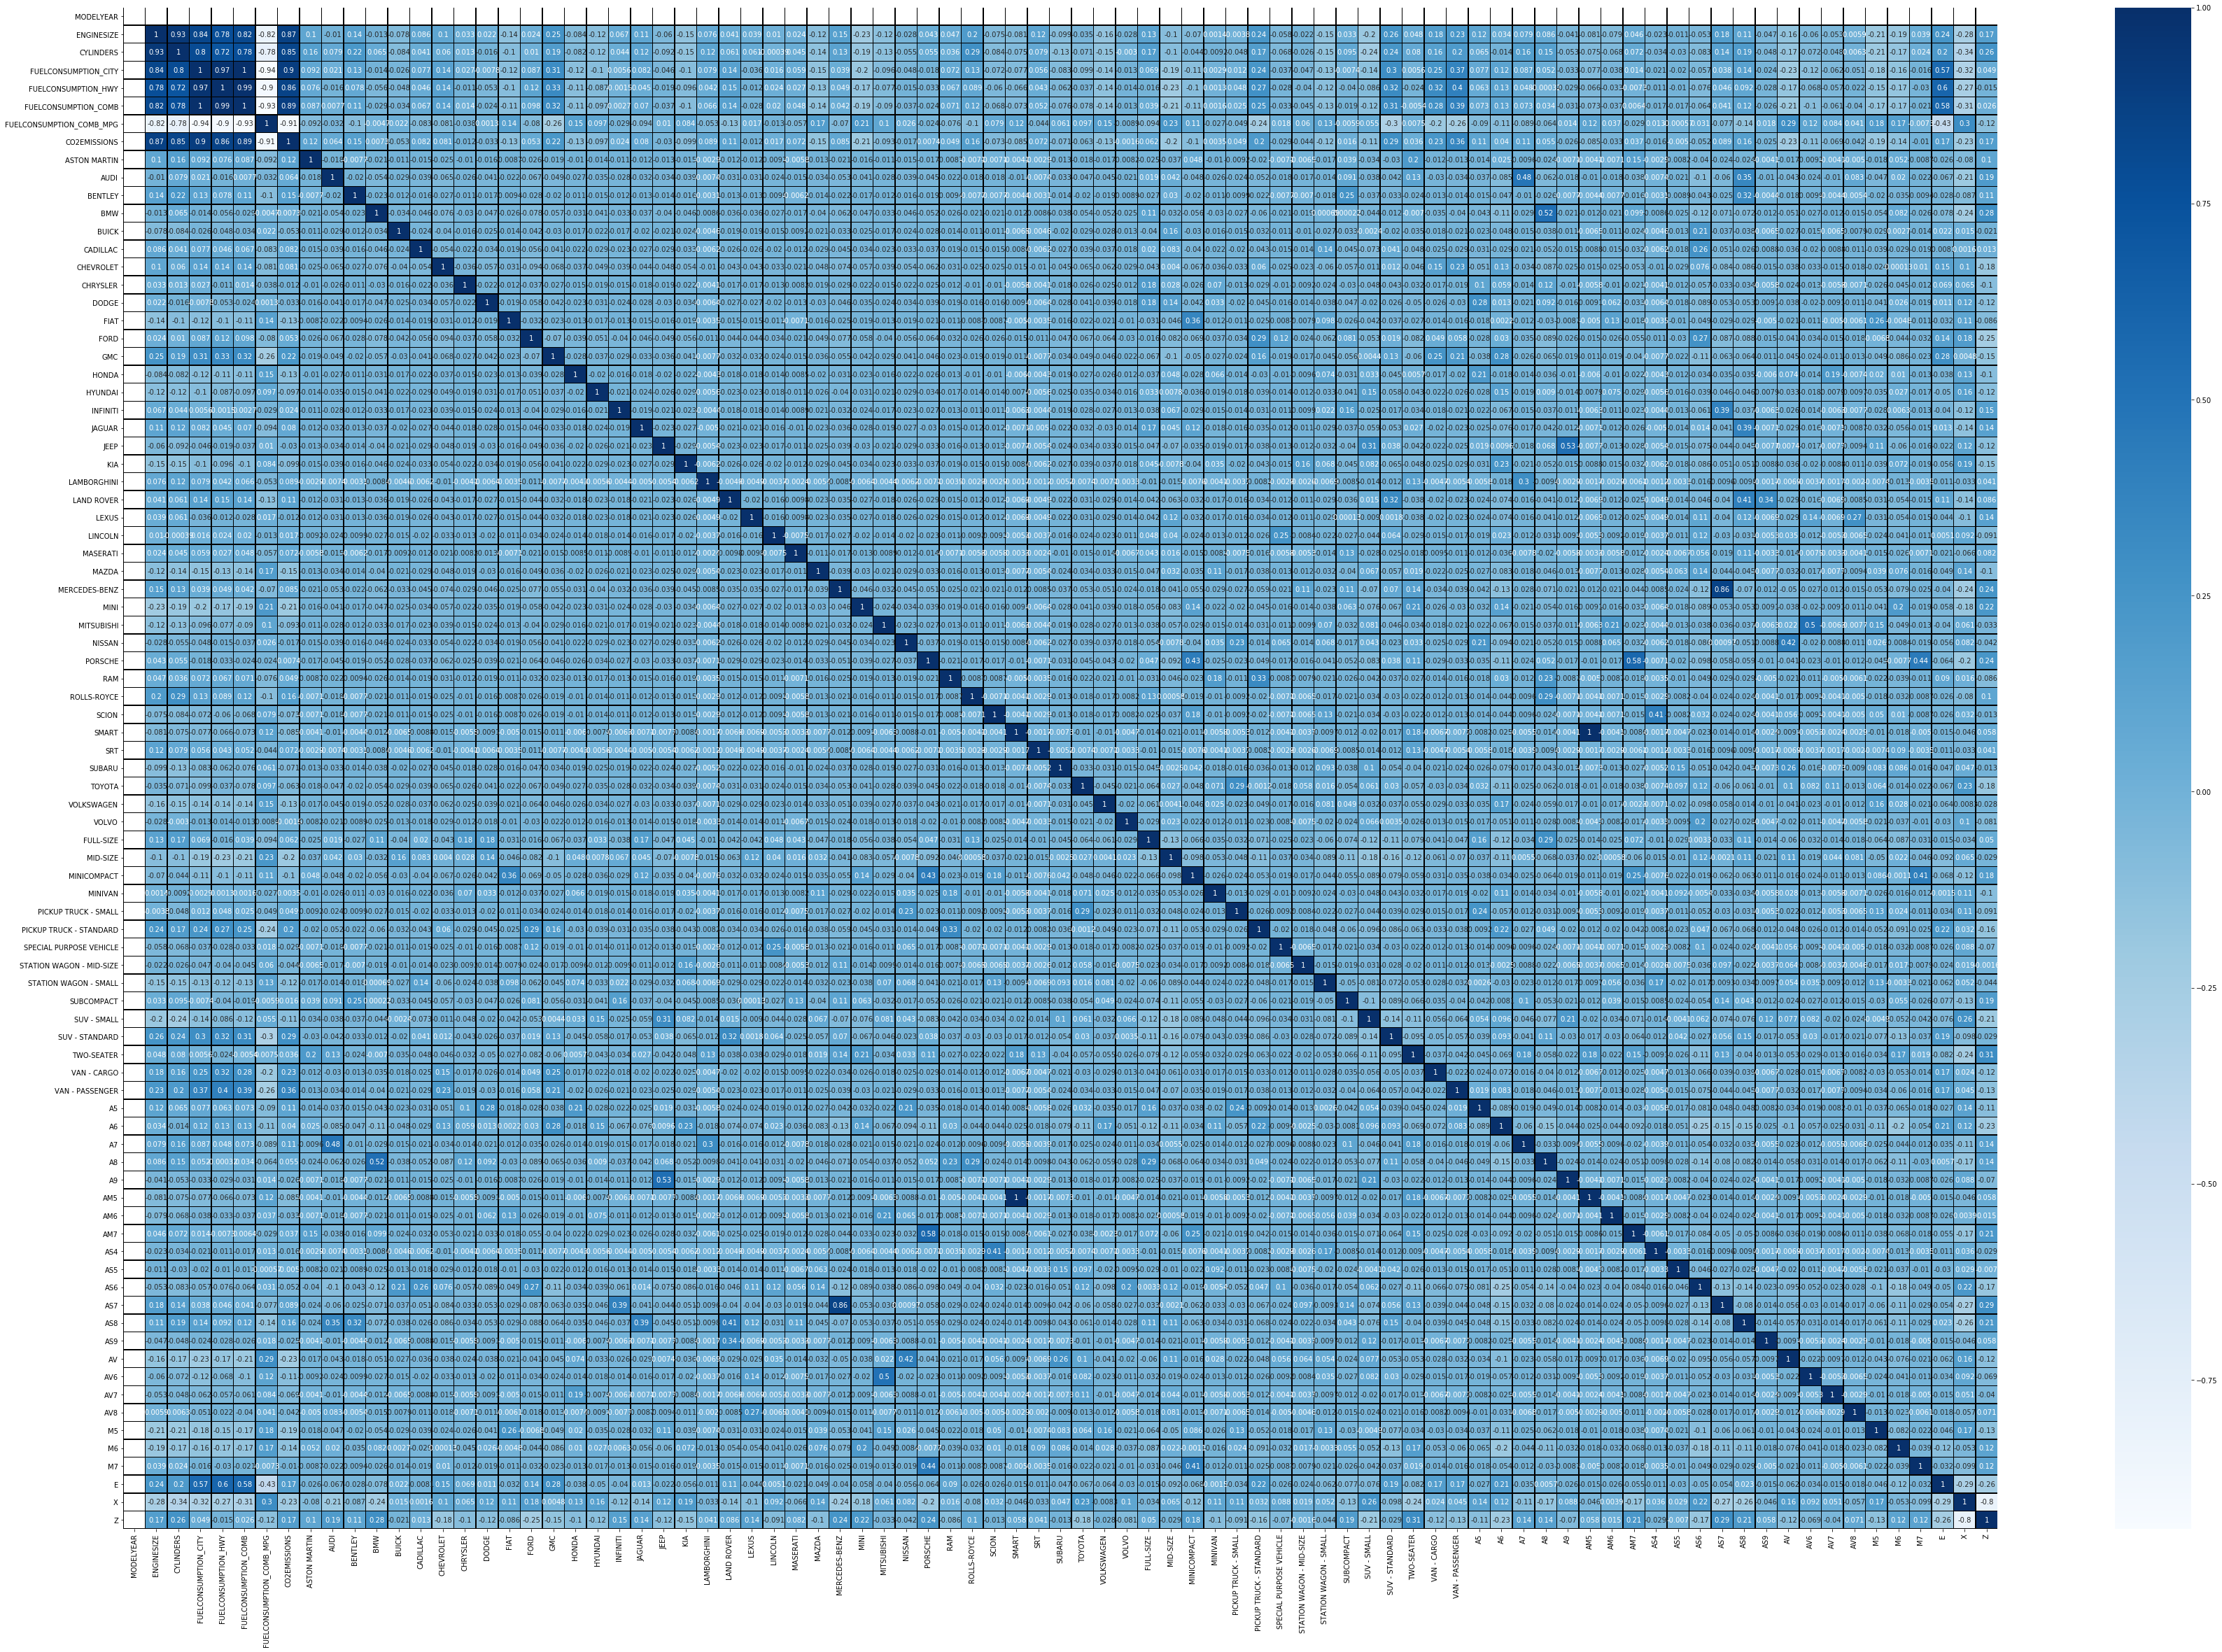

In [12]:
# 2 - Correlation of Training set dataframe
training_correlation = train_df.corr() # Exploring this correlation matrix tells us that the only useful attribute in relation to to co2emissions from the binaryized columns is the van - passenger attribute
plt.subplots(figsize=(60, 40))
sns.heatmap(training_correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A165818C8>,
      dtype=object)

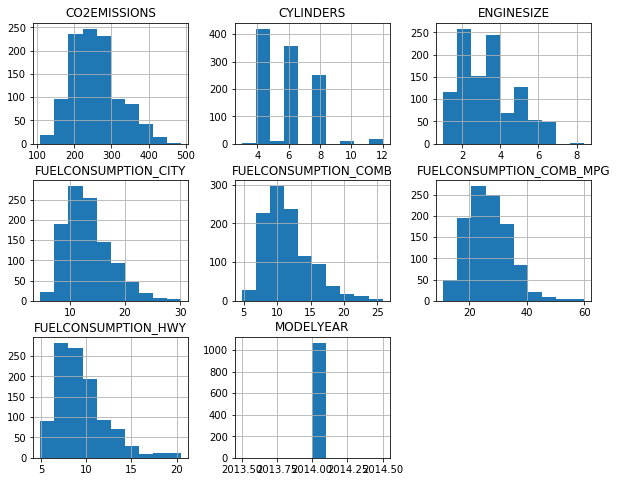

In [13]:
# 3 - histogram of original dataframe
df.hist(figsize=(10,8))

# 3.Simple linear regression

## A) If you should use only one of the independent variables of the dataset to predict CO2 emissions, which one would that be and why?



Answer: I am using the variable explorer to open up the variable correlation, there we can sort the co2emissions column and get the highest relation. The one with the highest is consumption in city. But I prefer the combined consumption because it will give a more varied result where some cars might be tuned for low consumption in city or the opposite. But I ended up using engine size since its always constant while consumption is not.

## B) Use sklearn packages to train a simple linear regression model with the chosen variable

In [14]:
#X_train = X_train['FUELCONSUMPTION_COMB'].to_numpy().reshape(-1,1) # Adjusting the X_train to only contain one variable
#X_test = X_test['FUELCONSUMPTION_COMB'].to_numpy().reshape(-1,1)

X_train_1 = X_train['ENGINESIZE'].to_numpy().reshape(-1,1) # Adjusting the X_train to only contain one variable
X_test_1 = X_test['ENGINESIZE'].to_numpy().reshape(-1,1)

In [15]:
# More Reshaping to catch 2d array errors
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [16]:
model = LinearRegression() # Creating the model
model.fit(X_train_1, y_train) # Fitting training data to the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## C) Print the model’s coefTicients

In [17]:
print(model.coef_)
print(model.intercept_)

[[38.99297872]]
[126.28970217]


## D) Plot the linear regression line on the training data

In [18]:
y_pred = model.predict(X_test_1)

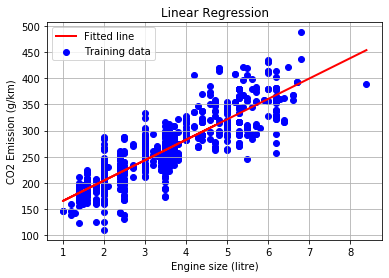

In [19]:
plt.scatter(X_train_1, y_train, color="blue", label="Training data")
plt.grid()
plt.xlabel("Engine size (litre)")
plt.ylabel("CO2 Emission (g/km)")
plt.title("Linear Regression")
plt.plot(X_test_1, y_pred, color="red", linewidth="2", label="Fitted line")
plt.legend()

plt.show()

## E) Evaluate your model using evaluation scores of

### a) Mean absolute error

In [20]:
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")

Mean absolute error: 24.097257411707837


### b) Residual sum of squares

In [21]:
print(f"Resudial sum of squares: {np.linalg.lstsq(y_test, y_pred)}")

Resudial sum of squares: (array([[0.99494794]]), array([210620.96412841]), 1, array([3806.42220464]))


### c) R2-score

In [22]:
print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: 0.7615595731934374


# 4. Multivariable linear regression

## A) If you should use a second independent variables of the dataset to predict CO2 emissions, which one would that be and why?

I would choose to go with the cylinder variable since its the second attribute that does not change.

## B) Use sklearn packages to train a multivariable linear regression model with the 2 chosen variables this time

In [23]:
X_train_2 = X_train[['ENGINESIZE', 'CYLINDERS']] # .to_numpy().reshape(-1,1)  Adjusting the X_train to only contain one variable
X_test_2 = X_test[['ENGINESIZE', 'CYLINDERS']] # .to_numpy().reshape(-1,1)

In [24]:
multi_model = LinearRegression()
multi_model.fit(X_train_2, y_train)
y_pred = multi_model.predict(X_test_2)

## C) Evaluate your new model using evaluation scores of
### a) Mean absolute error

In [25]:
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")

Mean absolute error: 23.754902758102915


### b) Residual sum of squares and

In [26]:
print(f"Resudial sum of squares: {np.linalg.lstsq(y_test, y_pred)}")

Resudial sum of squares: (array([[0.99541039]]), array([198889.37733232]), 1, array([3806.42220464]))


### c) R2-score

In [27]:
print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: 0.7748904347438591


## D) Compare the evaluation scores of the simple and multivariable linear models. Which one performs better? Can you further improve the performance of a regressor by considering additional attributes?

The multivariable linear model got a slightly higher score. I would assume that it would work better with a multivariable regression here. I could probarbly improve the score somewhat but it would introduce uncertanties into the model.